# Определение возраста покупателей

## Исследовательский анализ данных

### Импортируем библиотеки и модули

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Загружаем данные

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


### Посмотрим общую информацию о файле

In [3]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


### Выведем первые 10 строк датасета

In [4]:
labels.head(10)

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
5,000005.jpg,27
6,000006.jpg,24
7,000007.jpg,43
8,000008.jpg,26
9,000009.jpg,39


Мы видим, что каждой фотографии соответствует возраст человека.

### Посмотрим на график распределения возрастов в наших данных

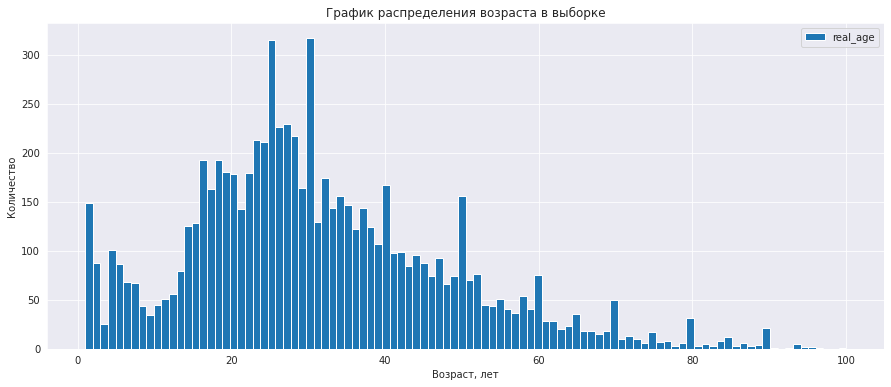

In [5]:
sns.set_style("dark")
labels.plot(kind='hist',figsize=(15,6),bins=100, grid=True)
plt.title('График распределения возраста в выборке')
plt.xlabel('Возраст, лет')
plt.ylabel('Количество')
plt.show()

### Применим функцию next для получения features и target из загруженных данных

In [6]:
features, target = next(train_gen_flow)

### Посмотрим на размер выборки

In [7]:
features.shape

(32, 224, 224, 3)

In [8]:
target.shape

(32,)

### Выведем 10 фото на экран

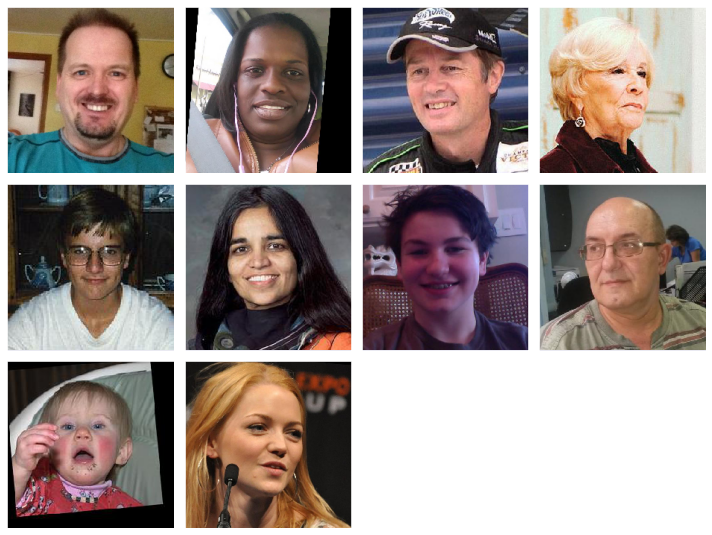

In [9]:
fig = plt.figure(figsize=(10,10))
for i in range(10):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

***Вывод***

- Общее число фотографий - 7591 размером 224*224;
- Есть черно-белые фото и с лишними объектами перед лицом (например, очки), фотографии сделаны с разных ракурсов;
- Возрастной дипазон фотографий от 1 года до 96 лет;
- Самое большое количество фотографий людей в диапазоне от 23 лет до 31 года.

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

### Обучение модели

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Модель определена правильно! Отлично, что применен горизонтальный флип на тренировочной части

### Вывод процесса обучения на экран

***Вывод***

- Использовали модель сверточной нейронной сети на ResNet50;
- MAE при 10 эпохах уменьшилось с 13.5624 до 6.1900;
- MAE на тестовой выборке достигло значения 6.1900.

## Анализ обученной модели

Была поставлена следующая задача: построить и обучить модель, которя сможет определять возраст человека по изображению с камеры со средним абсолютным отклонением не выше 8.

В нашем распоряжении был датасет с общим числом фотографий - 7591 размером 224*224. В нем присутствовали: черно-белые фото, с лишними объектами перед лицом (например, очки), фотографии сделанные с разных ракурсов и при различном освещении. Возрастной дипазон фотографий от 1 года до 96 лет. Самое большое количество фотографий людей в диапазоне от 23 лет до 31 года.

Использование GPU и нейронных сетей позволяет быстро и эффективно обработать большое количество информации с высокой точностью. В качестве основы за модель взяли уже предобученную нейросеть с архитектурой ResNet50 и дополнительно обучили её на наших данных без замораживания. В выходном слое применили оптимизацию Adam c шагом обучения 0.0003, а в качестве функции потерь использовалась mean_squared_error для ускорения процесса обучения.

Модель протестировали на 10 эпохах. MAE при 10 эпохах уменьшилось с 13.5624 до 6.1900. MAE на тестовой выборке достигло значения 6.1900. Это значение менее 8, что и требовалось по заданию.

Полученная модель вполне может решить поставленную бизнесом задачу, но нет предела совершенству.